In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import fmin_tnc
from sklearn.metrics import accuracy_score

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [3]:
def cost_func(theta, X, y, lambda_):
    m = y.shape[0]
    h = sigmoid(X @ theta)
    
    # Calculate Cost 
    J = -np.sum(y * np.log(h) + (1 - y) * np.log(1-h)) / m
    reg = (lambda_ / (2*m)) * np.sum(theta[1:] ** 2)
    J = J + reg
    
    # Calculate Gradient
    delta = ((h - y).T @ X).T / m
    grad = np.zeros((theta.shape))
    grad[0] = delta[0]
    grad[1:] = delta[1:] + (lambda_ / m) * theta[1:]
    return J, grad

## Multiclass Classification

In [4]:
class AdvancedOptimiztion:
    def __init__(self, X, y, k):
        self.X = X.astype(float)
        self.y = y.astype(float)
        self.k = k               # no. of classes, value of y should be between (0 to k-1)
        self.m = X.shape[0]      # no. of training samples
        self.n = X.shape[1]      # no. of features
        self.theta = np.zeros((self.n, k))
        
    def fit(self, lambda_):
        for i in range(self.k):
            out = fmin_tnc(func=cost_func, x0=self.theta[:, i], args=(self.X, (self.y==i).flatten(), lambda_))
            self.theta[:, i] = out[0]
            
    def predict(self, X_test):
        return np.argmax(X_test @ self.theta, axis=1).reshape(self.y.shape)
        

### Digit Recognition

In [5]:
mat = loadmat('..\datasets\ex3data1.mat')
X = mat['X']
y = mat['y']
print(X.shape, y.shape)

(5000, 400) (5000, 1)


In [6]:
y.min(), y.max()

(1, 10)

[10]


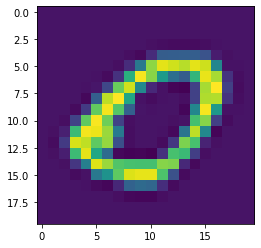

In [7]:
plt.imshow(X[0].reshape(20, 20))
print(y[0])

In [8]:
# Converting y = 10 for '0' to y = 0 for '0'
y[y == 10] = 0

In [9]:
y.min(), y.max()

(0, 9)

[0]


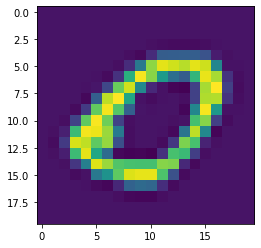

In [10]:
plt.imshow(X[0].reshape(20, 20))
print(y[0])

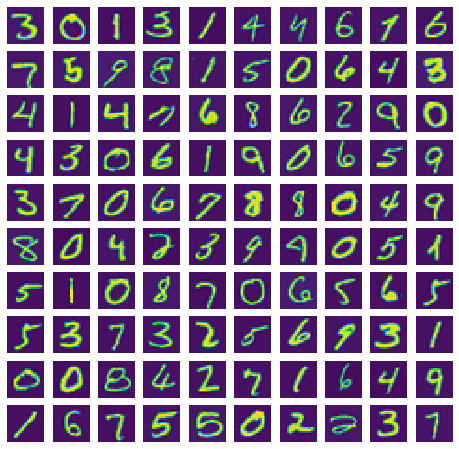

In [11]:
fig, ax = plt.subplots(10, 10, figsize=(8, 8))
for i in range(10):
    for j in range(10):
        ax[i, j].imshow(X[np.random.randint(0, X.shape[0]+1)].reshape(20, 20, order='F'))
        ax[i, j].axis('off')

In [12]:
# Adding the inercept
X = np.hstack((np.ones((X.shape[0],1)), X))
X.shape

(5000, 401)

In [13]:
ao = AdvancedOptimiztion(X, y, k=10)
ao.fit(lambda_=0.1)

In [14]:
y_pred = ao.predict(X)

In [15]:
accuracy_score(y, y_pred)

0.9646